In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns
import matplotlib.pyplot as plt


##### Importing the file into the system as df

In [2]:
df = pd.read_csv('heart.csv')
df.tail()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


##### Renaming the column header for better understanding of data

In [3]:
columns=['Age_of_person','Gender_of_the_person','Chest Pain type',
                        'resting blood pressure','cholestoral in mg/dl',
                        'fasting blood sugar','resting electrocardiographic results',
                        'maximum heart rate achieved','exercise induced angina',
                        'Previous peak','slp','caa','thall','output']

df.columns=columns

In [4]:
df.dtypes

Age_of_person                             int64
Gender_of_the_person                      int64
Chest Pain type                           int64
resting blood pressure                    int64
cholestoral in mg/dl                      int64
fasting blood sugar                       int64
resting electrocardiographic results      int64
maximum heart rate achieved               int64
exercise induced angina                   int64
Previous peak                           float64
slp                                       int64
caa                                       int64
thall                                     int64
output                                    int64
dtype: object

In [5]:
df.tail()

,Age_of_person,Gender_of_the_person,Chest Pain type,resting blood pressure,cholestoral in mg/dl,fasting blood sugar,resting electrocardiographic results,maximum heart rate achieved,exercise induced angina,Previous peak,slp,caa,thall,output
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


##### Checking the unique values for the columns

In [7]:
for column in df.columns:
    num_distinct_values = len(df[column].unique())
    print(f"{column}: {num_distinct_values} distinct values")

Age_of_person: 41 distinct values
Gender_of_the_person: 2 distinct values
Chest Pain type: 4 distinct values
resting blood pressure: 49 distinct values
cholestoral in mg/dl: 152 distinct values
fasting blood sugar: 2 distinct values
resting electrocardiographic results: 3 distinct values
maximum heart rate achieved: 91 distinct values
exercise induced angina: 2 distinct values
Previous peak: 40 distinct values
slp: 3 distinct values
caa: 5 distinct values
thall: 4 distinct values
output: 2 distinct values


In [6]:
df.columns

Index(['Age_of_person', 'Gender_of_the_person', 'Chest Pain type',
       'resting blood pressure', 'cholestoral in mg/dl', 'fasting blood sugar',
       'resting electrocardiographic results', 'maximum heart rate achieved',
       'exercise induced angina', 'Previous peak', 'slp', 'caa', 'thall',
       'output'],
      dtype='object')

##### Replacing the value of thall 0 as 2. Since, 2 means normal and it will give better prediction 

In [8]:
df['thall'] = df['thall'].replace(0, 2)

In [9]:
df_new=df.copy()

In [10]:
# Mapping for 'cp' column
cp_mapping = {0: 'typical angina',
              1: 'atypical angina',
              2: 'non-anginal pain',
              3: 'asymptomatic'}
df['Chest Pain type'] = df['Chest Pain type'].map(cp_mapping)

# Mapping for 'slp' column
slp_mapping = {0: 'unsloping',
               1: 'flat',
               2: 'downsloping'}
df['slp'] = df['slp'].map(slp_mapping)

# Mapping for 'thall' column
thall_mapping = {1: 'fixed defect',
                 2: 'normal',
                 3: 'reversible defect'}
df['thall'] = df['thall'].map(thall_mapping)

# Mapping for 'rest_ecg' column
rest_ecg_mapping = {0: 'normal',
                    1: 'ST-T wave abnormality',
                    2: 'left ventricular hypertrophy'}
df['resting electrocardiographic results'] = df['resting electrocardiographic results'].map(rest_ecg_mapping)

# Mapping for 'sex' column
sex_mapping = {1: 'male',
               0: 'female'}
df['Gender_of_the_person'] = df['Gender_of_the_person'].map(sex_mapping)

In [11]:
df.tail()

,Age_of_person,Gender_of_the_person,Chest Pain type,resting blood pressure,cholestoral in mg/dl,fasting blood sugar,resting electrocardiographic results,maximum heart rate achieved,exercise induced angina,Previous peak,slp,caa,thall,output
298,57,female,typical angina,140,241,0,ST-T wave abnormality,123,1,0.2,flat,0,reversible defect,0
299,45,male,asymptomatic,110,264,0,ST-T wave abnormality,132,0,1.2,flat,0,reversible defect,0
300,68,male,typical angina,144,193,1,ST-T wave abnormality,141,0,3.4,flat,2,reversible defect,0
301,57,male,typical angina,130,131,0,ST-T wave abnormality,115,1,1.2,flat,1,reversible defect,0
302,57,female,atypical angina,130,236,0,normal,174,0,0.0,flat,1,normal,0


##### Gender distribution of data 

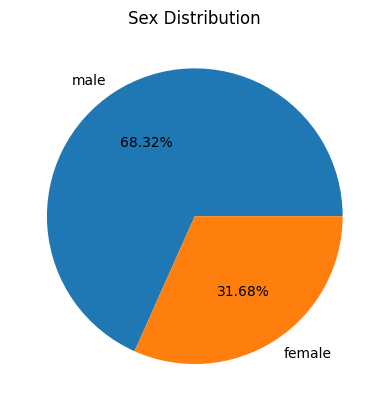

In [12]:
sex_count = df['Gender_of_the_person'].value_counts()
plt.pie(sex_count, labels=sex_count.index, autopct='%1.2f%%')
plt.title('Sex Distribution')
plt.show()

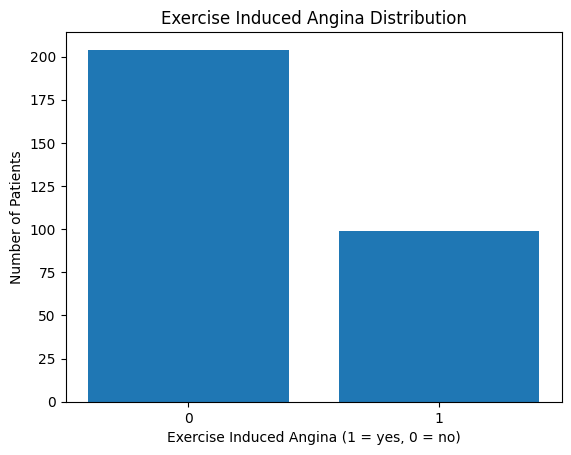

In [13]:
exang_count = df['exercise induced angina'].value_counts()
plt.bar(exang_count.index, exang_count.values)
plt.title('Exercise Induced Angina Distribution')
plt.xlabel('Exercise Induced Angina (1 = yes, 0 = no)')
plt.ylabel('Number of Patients')
plt.xticks(exang_count.index)
plt.show()

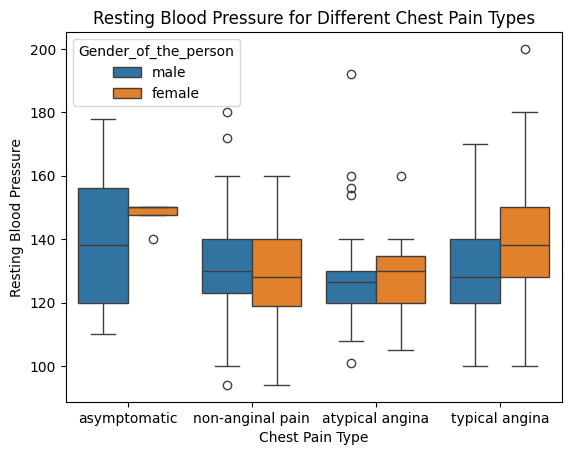

In [14]:
sns.boxplot(x='Chest Pain type', y='resting blood pressure',hue='Gender_of_the_person', data=df)
plt.title('Resting Blood Pressure for Different Chest Pain Types')
plt.xlabel('Chest Pain Type')
plt.ylabel('Resting Blood Pressure')
plt.show()

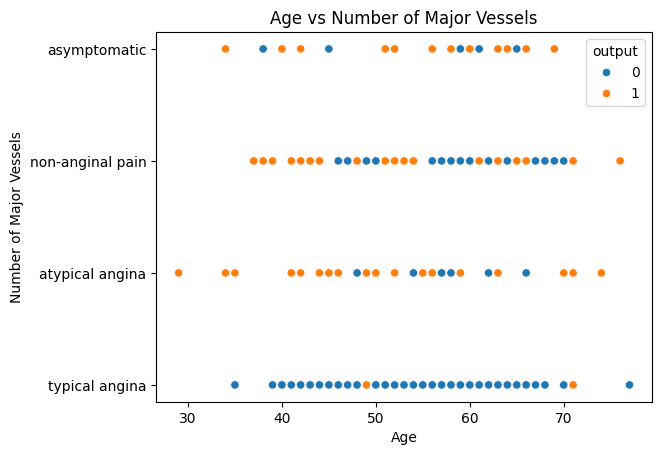

In [15]:
sns.scatterplot(x='Age_of_person', y='Chest Pain type', hue='output', data=df)
plt.title('Age vs Number of Major Vessels')
plt.xlabel('Age')
plt.ylabel('Number of Major Vessels')
plt.show()

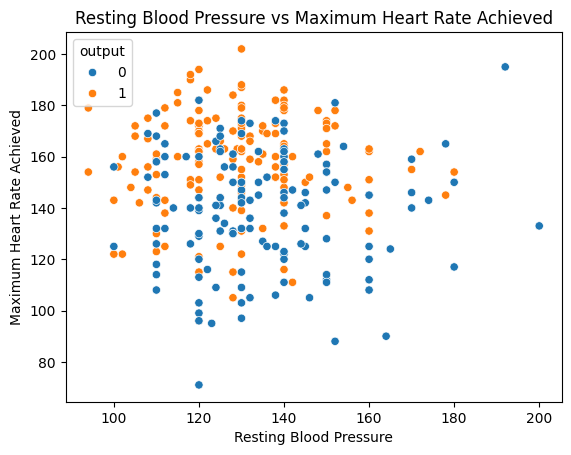

In [16]:
sns.scatterplot(x='resting blood pressure', y='maximum heart rate achieved', hue='output', data=df)
plt.title('Resting Blood Pressure vs Maximum Heart Rate Achieved')
plt.xlabel('Resting Blood Pressure')
plt.ylabel('Maximum Heart Rate Achieved')
plt.show()

In [17]:
df['Age_of_person'].sort_values().unique()

array([29, 34, 35, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 74, 76, 77])

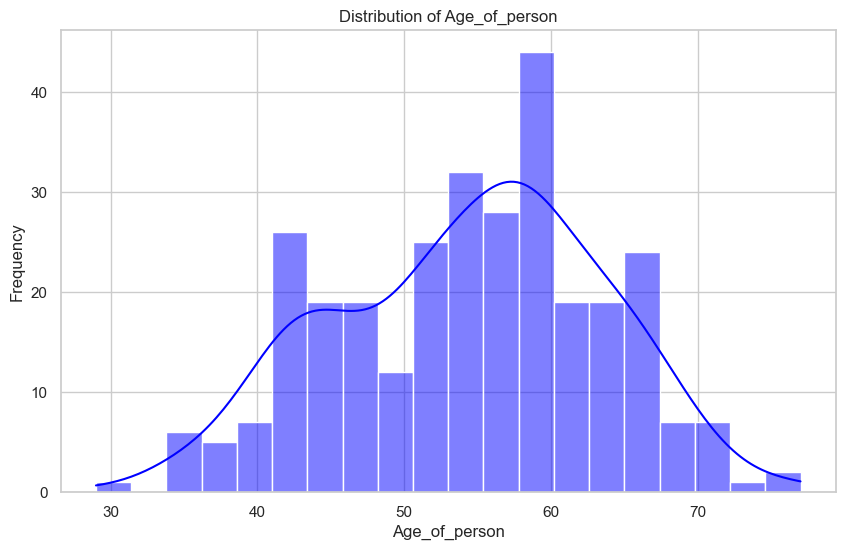

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

plt.figure(figsize=(10, 6))
sns.histplot(df['Age_of_person'], bins=20, kde=True, color='blue')
plt.title('Distribution of Age_of_person')
plt.xlabel('Age_of_person')
plt.ylabel('Frequency')
plt.show()


In [19]:
df['maximum heart rate achieved'].sort_values().unique()

array([ 71,  88,  90,  95,  96,  97,  99, 103, 105, 106, 108, 109, 111,
       112, 113, 114, 115, 116, 117, 118, 120, 121, 122, 123, 124, 125,
       126, 127, 128, 129, 130, 131, 132, 133, 134, 136, 137, 138, 139,
       140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152,
       153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165,
       166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 177, 178, 179,
       180, 181, 182, 184, 185, 186, 187, 188, 190, 192, 194, 195, 202])

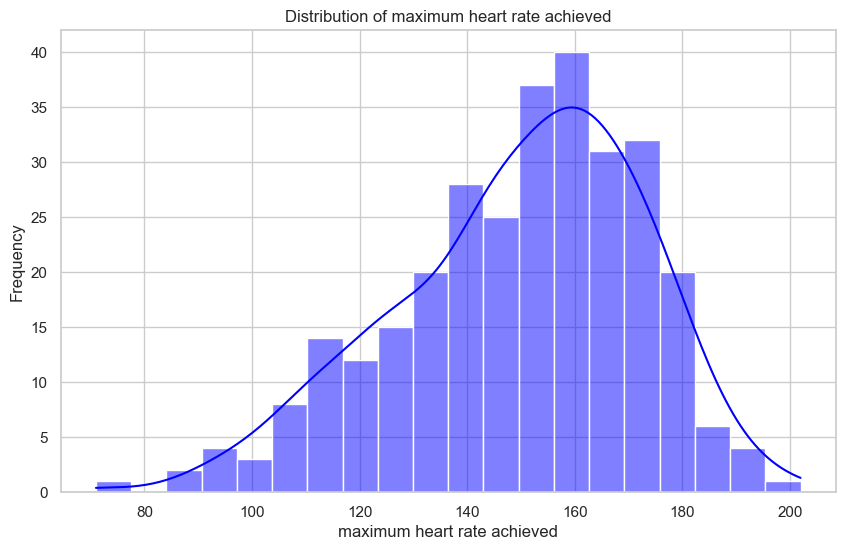

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

plt.figure(figsize=(10, 6))
sns.histplot(df['maximum heart rate achieved'], bins=20, kde=True, color='blue')
plt.title('Distribution of maximum heart rate achieved')
plt.xlabel('maximum heart rate achieved')
plt.ylabel('Frequency')
plt.show()

In [21]:
df['Chest Pain type'].sort_values().unique()

array(['asymptomatic', 'atypical angina', 'non-anginal pain',
       'typical angina'], dtype=object)

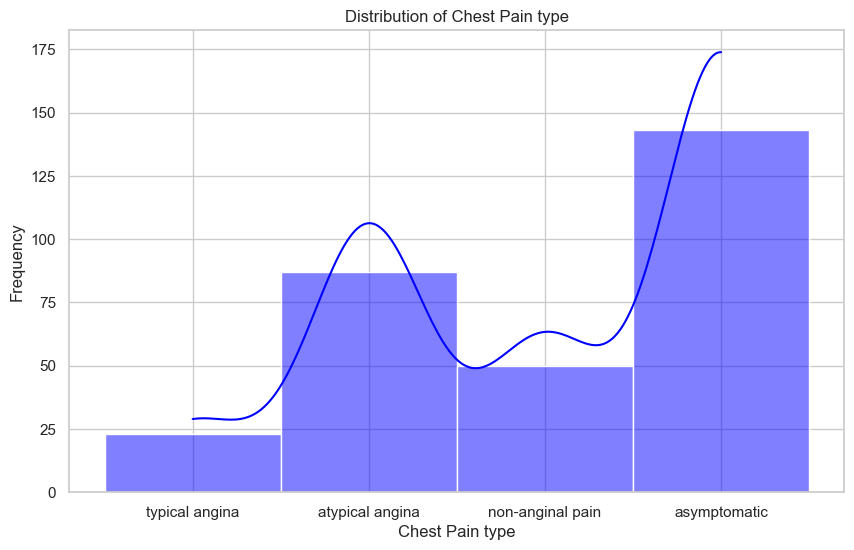

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

plt.figure(figsize=(10, 6))
sns.histplot(df['Chest Pain type'], bins=20, kde=True, color='blue')
plt.title('Distribution of Chest Pain type')
plt.xlabel('Chest Pain type')
plt.xticks(ticks=[0,1,2,3], labels=['typical angina', 'atypical angina', 'non-anginal pain', 'asymptomatic'])
plt.ylabel('Frequency')
plt.show()

In [23]:
df_new.tail()

,Age_of_person,Gender_of_the_person,Chest Pain type,resting blood pressure,cholestoral in mg/dl,fasting blood sugar,resting electrocardiographic results,maximum heart rate achieved,exercise induced angina,Previous peak,slp,caa,thall,output
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


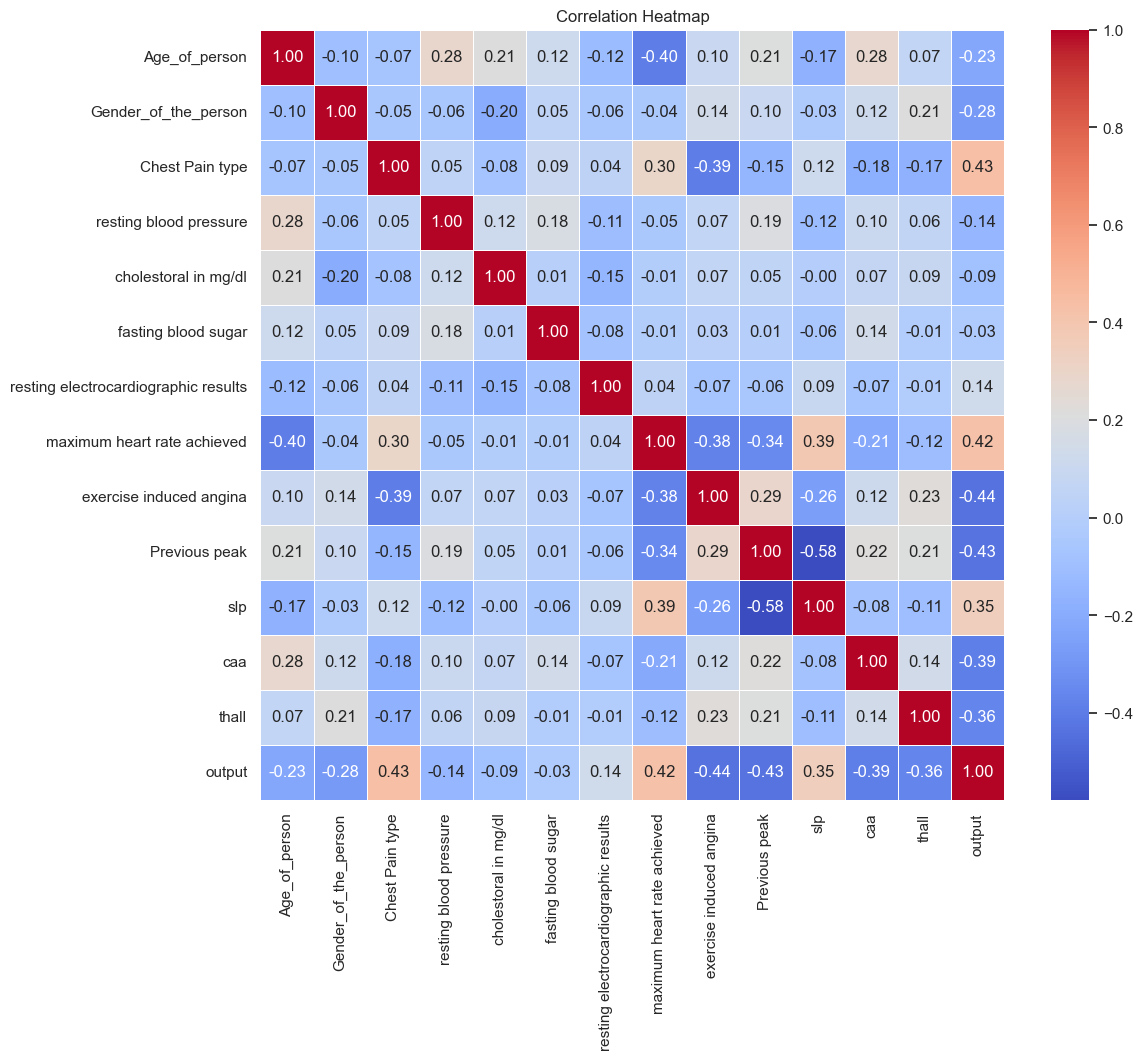

In [24]:
correlation_matrix = df_new.corr()

plt.figure(figsize=(12, 10))

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

plt.title('Correlation Heatmap')
plt.show()

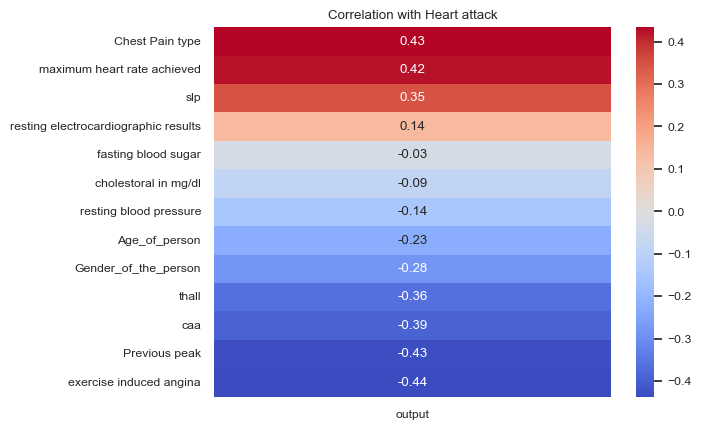

In [25]:
target_corr = correlation_matrix['output'].drop('output')
target_corr_sorted = target_corr.sort_values(ascending=False)
sns.set(font_scale=0.8)
sns.set_style("white")
sns.set_palette("PuBuGn_d")
sns.heatmap(target_corr_sorted.to_frame(), cmap="coolwarm", annot=True, fmt='.2f')
plt.title('Correlation with Heart attack')
plt.show()

In [26]:
df_x=df_new.drop('output',axis=1)
df_y=df_new['output']
df_y=df_y.ravel()
x_train,x_test,y_train,y_test = train_test_split(df_x,df_y,random_state=33)

In [27]:

rc=RandomForestClassifier()
rc.fit(x_train,y_train)
y_pred=rc.predict(x_test)
print(f"The accuracy score is {accuracy_score(y_pred,y_test)}")

The accuracy score is 0.8157894736842105


In [55]:
from sklearn.feature_selection import SelectFromModel
sel = SelectFromModel(rc)
sel.fit(x_train, y_train)
ot=sel.get_support()

In [56]:
df_x.iloc[:,ot].tail()

,Age_of_person,resting blood pressure,cholestoral in mg/dl,maximum heart rate achieved,exercise induced angina,Previous peak,caa,thall,new_chest_pain,heart_chest_pain,thall_new
298,57,140,241,123,1,0.2,0,3,0.0,0.0,1.0
299,45,110,264,132,0,1.2,0,3,1.0,1.0,1.0
300,68,144,193,141,0,3.4,2,3,0.0,0.0,1.0
301,57,130,131,115,1,1.2,1,3,0.0,0.0,1.0
302,57,130,236,174,0,0.0,1,2,0.5,0.5,0.0


In [53]:
import statsmodels.api as sm
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
import sklearn
import xgboost as xgb
from xgboost.sklearn import XGBClassifier

In [31]:
%%time
LR = LogisticRegression(solver='lbfgs', max_iter=10000, random_state=33)
RF = RandomForestClassifier(n_estimators = 100, random_state=33)
SVM = SVC(random_state=0, probability=True)
KNC = KNeighborsClassifier()
DTC = DecisionTreeClassifier()
ABC = AdaBoostClassifier(n_estimators = 100)
BC = BaggingClassifier(n_estimators = 100)
GBC = GradientBoostingClassifier(n_estimators = 100)
# clf_XGB = XGBClassifier(n_estimators = 100, objective= 'binary:logistic', seed=555, use_label_encoder=False)
clf_XGB = XGBClassifier(n_estimators = 100, seed=555, use_label_encoder=False, eval_metric='logloss')
clfs = []
print('5-fold cross validation:\n')
for clf, label in zip([LR, RF, KNC, DTC, ABC, BC, GBC, clf_XGB],
                      ['Logistic Regression',
                       'Random Forest',
                       'KNeighbors',
                       'Decision Tree',
                       'Ada Boost',
                       'Bagging',
                       'Gradient Boosting',
                       'XGBoost']):
    scores = sklearn.model_selection.cross_val_score(clf, x_train, y_train, cv=5, scoring="accuracy")
    print("Train CV Accuracy: %0.3f (+/- %0.3f) [%s]" % (scores.mean(), scores.std(), label))
    md = clf.fit(x_train, y_train)
    clfs.append(md)
    accuracy_score_new = sklearn.metrics.accuracy_score(clf.predict(x_test), y_test)
    print("Test Accuracy: %0.4f " % (accuracy_score_new))

5-fold cross validation:

Train CV Accuracy: 0.841 (+/- 0.023) [Logistic Regression]
Test Accuracy: 0.8553 
Train CV Accuracy: 0.802 (+/- 0.038) [Random Forest]
Test Accuracy: 0.8026 
Train CV Accuracy: 0.678 (+/- 0.084) [KNeighbors]
Test Accuracy: 0.5395 
Train CV Accuracy: 0.713 (+/- 0.042) [Decision Tree]
Test Accuracy: 0.7105 
Train CV Accuracy: 0.757 (+/- 0.026) [Ada Boost]
Test Accuracy: 0.7237 
Train CV Accuracy: 0.806 (+/- 0.042) [Bagging]
Test Accuracy: 0.7237 
Train CV Accuracy: 0.801 (+/- 0.038) [Gradient Boosting]
Test Accuracy: 0.7763 
Train CV Accuracy: 0.793 (+/- 0.043) [XGBoost]
Test Accuracy: 0.8158 
CPU times: user 2.16 s, sys: 175 ms, total: 2.34 s
Wall time: 1.62 s


##### Feature Engineering

### heart_rate(max_heart_rate):
Assigns a score based on the maximum heart rate.
Returns 1 if max_heart_rate is greater than 150.
Returns 0.5 if max_heart_rate is greater than 100.
Returns 0 otherwise.
    
### blood_pressure(blood_pres):
Assigns a score based on blood pressure.
Returns 1 if blood_pres is greater than 160.
Returns 0.5 if blood_pres is greater than 120.
Returns 0 otherwise.
    
### age_group(age):
Assigns a score based on age.
Different age groups receive different scores.
Returns 1 for ages greater than 60, 0.80 for ages greater than 50, 0.70 for ages greater than 40, 0.60 for ages greater than 30, 0.50 for ages greater than 20, and 0 otherwise.
                                                                                                
### chest_pain(pain):
Assigns a score based on chest pain.
Returns 1 for severe chest pain (pain == 3), 0.75 for moderate chest pain (pain == 2), 0.5 for mild chest pain (pain == 1), and 0 otherwise.

                                                                                                
### heart_chest_pain(pain_new):
Combines information about chest pain and maximum heart rate to assign a score.
Returns 1 if chest pain is severe (pain == 3) and max heart rate is greater than 130.
Returns 0.75 if chest pain is moderate (pain == 2) and max heart rate is greater than 150.
Returns 0.50 if chest pain is mild (pain == 1) and max heart rate is greater than 120.
Returns 0 otherwise.
    
### thall(pain):
Assigns a score based on a variable named pain.
Returns 1 if pain is 3, 0.5 if pain is 1, and 0 otherwise.

In [52]:
def heart_rate(max_heart_rate):
    if max_heart_rate> 150:
        return 1
    elif max_heart_rate > 100:
        return 0.5
    else:
        return 0

def blood_pressure(blood_pres):
    if blood_pres> 160:
        return 1
    elif blood_pres > 120:
        return 0.5
    else:
        return 0

def age_group(age):
    if age> 60:
        return 1
    elif age > 50:
        return 0.80
    elif age > 40:
        return 0.70
    elif age>30:
        return 0.60
    elif age>20:
        return 0.50
    else:
        return 0
def chest_pain(pain):
    if pain==3:
        return 1
    elif pain ==2:
        return 0.75
    elif pain ==1:
        return 0.5
    else:
        return 0
    
def heart_chest_pain(pain_new):
    pain=pain_new['Chest Pain type']
    max_heart_rate=pain_new['maximum heart rate achieved']
    if pain==3 and max_heart_rate> 130:
        return 1
    elif pain==2 and max_heart_rate> 150:
        return 0.75
    elif pain==1 and max_heart_rate > 120:
        return 0.50
    else:
        return 0

def thall(pain):
    if pain==3:
        return 1
    elif pain ==1:
        return 0.5
    else:
        return 0

In [33]:
df_new['new_heart_rate']=df_new['maximum heart rate achieved'].apply(heart_rate)
df_new['new_blood_pres']=df_new['resting blood pressure'].apply(blood_pressure)
df_new['new_age_grp']=df_new['Age_of_person'].apply(age_group)
df_new['new_chest_pain']=df_new['Chest Pain type'].apply(chest_pain)
df_new['heart_chest_pain']=df_new[['Chest Pain type','maximum heart rate achieved']].apply(heart_chest_pain,axis=1)
df_new['thall_new']=df_new['thall'].apply(thall)

In [34]:
df_x=df_new.drop('output',axis=1)
df_y=df_new['output']
df_y=df_y.ravel()

#### Let's check the accuracy of our model after using some new features

In [35]:
x_train,x_test,y_train,y_test = train_test_split(df_x, df_y, test_size=0.2, random_state=42)
rc = RandomForestClassifier(n_estimators = 100, random_state=33)
rc.fit(x_train,y_train)
y_pred=rc.predict(x_test)
print("Test Accuracy: %0.4f " % (accuracy_score(y_pred,y_test)))

Test Accuracy: 0.8689 


#### Fine Tuning some of the parameters to find the heighest accuracy of random forest model

In [37]:

param_grid_rf = {
    'n_estimators': [50, 100, 150, 200],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(df_x, df_y, test_size=0.2, random_state=42)

In [45]:
rf = RandomForestClassifier(random_state=33)
grid_search_rf = GridSearchCV(estimator=rf, param_grid=param_grid_rf, cv=5, scoring='accuracy')

# Fit the model to the data
grid_search_rf.fit(x_train, y_train)

# Get the best hyperparameters for RandomForestClassifier
best_params_rf = grid_search_rf.best_params_
print("Best Hyperparameters for RandomForestClassifier:", best_params_rf)

# Use the best RandomForestClassifier model for predictions
best_rf_model = grid_search_rf.best_estimator_
y_pred=best_rf_model.predict(x_test)
rf_accuracy = sklearn.metrics.accuracy_score(y_pred, y_test)
print("RandomForestClassifier Test Accuracy: %0.4f " % rf_accuracy)

Best Hyperparameters for RandomForestClassifier: {'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 100}
RandomForestClassifier Test Accuracy: 0.8852 


##### Now the accuracy of our model is 88.52%

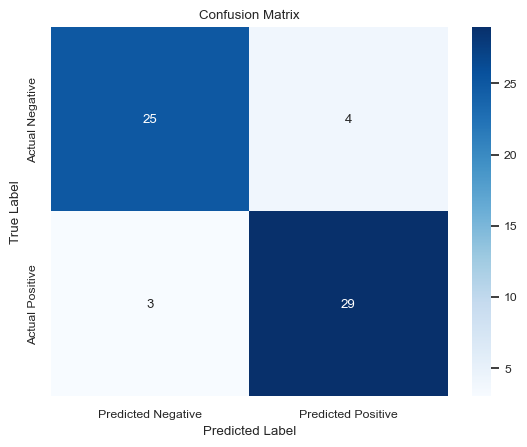

In [46]:
import seaborn as sns
import matplotlib.pyplot as plt

# Get the predicted labels
y_pred = best_rf_model.predict(x_test)

# Create a confusion matrix
conf_matrix = sklearn.metrics.confusion_matrix(y_test, y_pred)

# Create a heatmap using seaborn
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted Negative', 'Predicted Positive'], yticklabels=['Actual Negative', 'Actual Positive'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

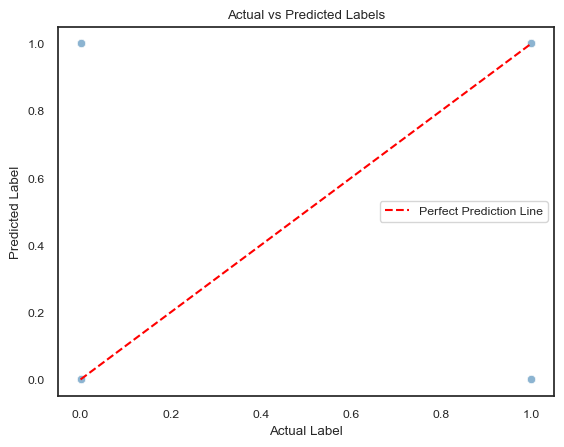

In [47]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Create a DataFrame with actual and predicted labels
df_results = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

# Scatter plot with a reference line
sns.scatterplot(x='Actual', y='Predicted', data=df_results)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', label='Perfect Prediction Line')
plt.xlabel('Actual Label')
plt.ylabel('Predicted Label')
plt.title('Actual vs Predicted Labels')
plt.legend()
plt.show()


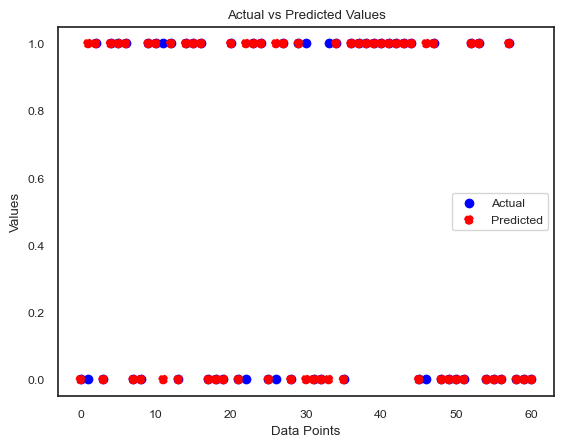

In [48]:
import matplotlib.pyplot as plt

# Scatter plot for actual values
plt.scatter(range(len(y_test)), y_test, color='blue', label='Actual')

# Line plot for predicted values
plt.scatter(range(len(y_pred)), y_pred, color='red', label='Predicted', linestyle='dashed')

# Adding labels and title
plt.xlabel('Data Points')
plt.ylabel('Values')
plt.title('Actual vs Predicted Values')

# Adding legend
plt.legend()

# Display the plot
plt.show()


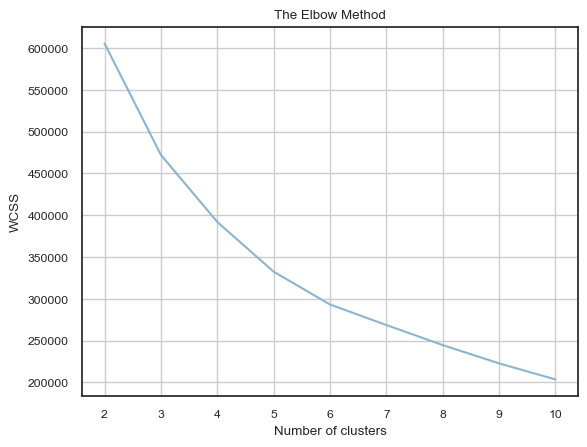

In [49]:
from sklearn.cluster import KMeans
# Initialising wcss list
wcss = []
# Running the for loop
for i in range(2, 11):
 # Generating kmeans model with n_clusters=ith iteration of the for loop
 k_means = KMeans(n_clusters = i, init = 'k-means++', random_state = 42,n_init=100)
 # Ftting the model onto the dataset 'X'
 k_means.fit(df_new)
 # Appending the sum of squares to wcss
 wcss.append(k_means.inertia_) 
# Plot of the results using the Elbow Method
plt.plot(range(2, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.grid()
plt.show()

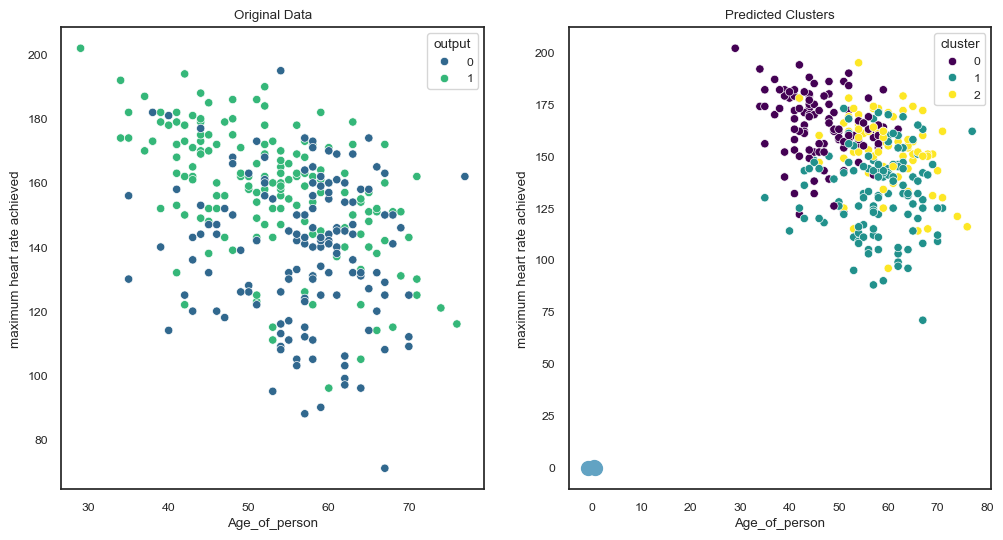

In [50]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'df' is your DataFrame with the data
# Drop the 'output' column as it is the target variable
df_cluster = df_new.drop('output', axis=1)

# You might want to scale your features before applying K-Means
# This is particularly important if features are on different scales
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_cluster_scaled = scaler.fit_transform(df_cluster)

# Choose the number of clusters
n_clusters = 3

# Apply K-Means clustering
kmeans = KMeans(n_clusters=n_clusters, random_state=42,n_init=100)
df_new['cluster'] = kmeans.fit_predict(df_cluster_scaled)

# Visualize the original data and predicted clusters
plt.figure(figsize=(12, 6))

# Plot original data
plt.subplot(1, 2, 1)
sns.scatterplot(x='Age_of_person', y='maximum heart rate achieved', hue='output', data=df_new, palette='viridis')
plt.title('Original Data')

# Plot predicted clusters
plt.subplot(1, 2, 2)
sns.scatterplot(x='Age_of_person', y='maximum heart rate achieved', hue='cluster', data=df_new, palette='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=100)  # plot cluster centers
plt.title('Predicted Clusters')

plt.show()


/Users/bikashadhikari/.pyenv/versions/3.8.12/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


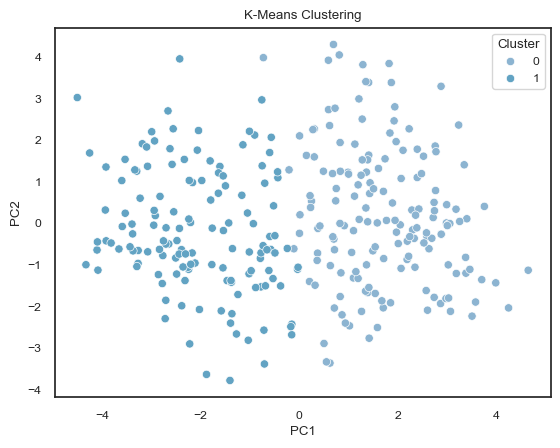

In [51]:
from sklearn.cluster import KMeans
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Standardize the data
scaler = StandardScaler()
df_x_scaled = scaler.fit_transform(df_x)

# Apply PCA for dimensionality reduction (optional)
pca = PCA(n_components=2)
df_x_pca = pca.fit_transform(df_x_scaled)

# Apply K-Means clustering
kmeans = KMeans(n_clusters=2, random_state=42)
clusters = kmeans.fit_predict(df_x_scaled)

# Visualize the clusters (using PCA for 2D visualization)
df_clusters = pd.DataFrame({'Cluster': clusters})
df_clusters['Cluster'] = df_clusters['Cluster'].astype(str)

df_plot = pd.DataFrame(df_x_pca, columns=['PC1', 'PC2'])
df_plot = pd.concat([df_plot, df_clusters], axis=1)

sns.scatterplot(x='PC1', y='PC2', hue='Cluster', data=df_plot)
plt.title('K-Means Clustering')
plt.show()


##### Both supervised and unsupervised machine learning was done, and decided to move forward with random forest as it is giving the accuracy of 88% after fine tuning the model